In [2]:
import nltk
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
tknzr = TweetTokenizer()
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import pandas as pd
import numbers

/Users/elenajia/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
import spacy
nlp = spacy.load('en')
from spacy.en import English
parser = English()

In [37]:
from spacy.symbols import nsubj, dobj, pobj, VERB
from spacy.symbols import *
import numpy as np

### test spacy on s_med_5000

In [5]:
df_s = pd.read_csv('s_med_with_score_first5000.csv')

In [23]:
def labelMed(sent):
    doc = parser(sent)
    dictionary = {}
    
    for word in doc:
        dictionary[word.orth_] = word.dep_

    # print (dictionary)
    
    res = []
    
    for key, value in dictionary.items():
        if "medicine" in key:
            res.append(value)
        if "medication" in key:
            res.append(value)
        if "meds" in key:
            res.append(value)
    
    return '_'.join(res)        
#     return res
    
    # print (res)
    # return dictionary
        
    # if wor.dep == nsubj and possible_subject.head.pos == VERB:
    # verbs.add(possible_subject.head)

In [24]:
test =  "I'm against taking medication after what I had to deal with in the past but I realized this is my only option to get better."
labelMed(test)

'dobj'

In [25]:
# df_s

In [26]:
df_s['dict'] = df_s['sentence'].map(lambda x: labelMed(x))

In [10]:
# df_s

In [27]:
def select_nubj_or_obj_or_other(label_list):
    if 'nsubj' in label_list:
        return 1
    elif 'pobj' in label_list or 'dobj' in label_list or 'iobj' in label_list:
        return -1
    else:
        return 0

In [28]:
df_s['identifier'] = df_s['dict'].map(lambda x: select_nubj_or_obj_or_other(x))

In [31]:
df_s.dict.unique()

array(['compound', 'dobj', 'pobj', 'conj', 'nsubj', 'ROOT', 'dative',
       'nsubjpass', 'appos', 'npadvmod', 'ccomp', 'attr', 'pobj_pobj',
       'npadvmod_dobj', 'conj_attr', 'pobj_nsubj', 'nmod', 'dobj_pobj',
       'dobj_conj', 'pobj_dobj', 'amod', 'conj_pobj', 'dobj_nsubj', 'dep',
       'dobj_compound', 'pobj_neg', 'dep_compound', 'advcl', 'poss', 'aux',
       'dobj_dobj', 'advmod', 'mark', 'appos_ROOT', 'acl', 'parataxis',
       'prep', 'conj_dobj', 'pobj_npadvmod', 'pobj_compound', 'dobj_acl',
       'nsubj_pobj', 'dobj_appos', 'meta', 'nsubj_nsubj', 'acomp',
       'compound_pobj', 'oprd', 'pobj_attr', 'pcomp', 'nsubj_conj',
       'relcl', 'nsubj_dobj', 'conj_nsubj_dobj', 'pobj_conj',
       'compound_dobj'], dtype=object)

In [34]:
from collections import Counter

Counter(df_s.dict).most_common(10)

[('pobj', 2013),
 ('dobj', 1741),
 ('nsubj', 524),
 ('conj', 226),
 ('attr', 117),
 ('compound', 105),
 ('npadvmod', 36),
 ('appos', 29),
 ('nsubjpass', 26),
 ('ROOT', 24)]

In [30]:
df_s_nsubj = df_s[df_s['identifier'] == 1]
df_s_nsubj.to_csv('s_med_5000_nsubj.csv')

In [31]:
df_s_obj = df_s[df_s['identifier'] == -1]
df_s_obj.to_csv('s_med_5000_obj.csv')

df_s_other = df_s[df_s['identifier'] == 0]
df_s_other.to_csv('s_med_5000_other.csv')

In [117]:
def print_score_row(df):
    
    for i in df.index:
        ts = df[df.index==i]
        print( ts[['pos_vader', 'neu_vader', 'neg_vader']])
        print( ts['sentence'].values[0])
    
def returnmost(dataframe, pos):
    pospeech_df = dataframe[dataframe['dict'] == pos][['Unnamed: 0','pos_vader', 'neu_vader', 'neg_vader', 'sentence']]
    pospeech_df = pospeech_df.reset_index(drop=True)
#     print(pospeech_df)
#     print(pospeech_df.sort_values('pos_vader', ascending=False)[:5])
    # Most pos
    print('========== MOST POSITIVE ========== ')
    print_score_row(pospeech_df.sort_values('pos_vader', ascending=False)[:5])
    
    # most neu
    print('========== MOST NEUTRAL ========== ')
    print_score_row(pospeech_df.sort_values('neu_vader', ascending=False)[:5])
    
    # most neg
    print('========== MOST negative ========== ')
    print_score_row(pospeech_df.sort_values('neg_vader', ascending=False)[:5])
    
    # random sample
    ind = np.argsort(np.random.rand(pospeech_df.shape[0]))
    print('========== RANDOM SAMPLE ========== ')
    print_score_row(pospeech_df[[x in ind[:10] for x in pospeech_df.index]])

In [121]:
returnmost(df_s, 'conj')

========== MOST POSITIVE ========== 
    pos_vader  neu_vader  neg_vader
52      0.474      0.526        0.0
My SO is super supportive and was pretty much responsible for my finally getting the right doctors and meds.
     pos_vader  neu_vader  neg_vader
201      0.441      0.559        0.0
Can anyone recommend a solution or a medication I can take to calm myself down?
    pos_vader  neu_vader  neg_vader
98      0.371      0.629        0.0
I'm doing everything I can to stay relaxed and healthy (therapy, medication, etc.
     pos_vader  neu_vader  neg_vader
173       0.31      0.611       0.08
I work very hard with the help of meditation and medication to remain a functional and loving parent.
    pos_vader  neu_vader  neg_vader
72      0.306      0.532      0.162
Please, I don't want therapy or medication.
========== MOST NEUTRAL ========== 
     pos_vader  neu_vader  neg_vader
113        0.0        1.0        0.0
During the school year I attended therapy with a private professional,an

In [69]:
df_s

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier
0,0,0.999358,0.000642,0.227,0.724,0.049,I have a feeling that this will only get worse...,compound,0
1,1,0.999837,0.000163,0.081,0.791,0.128,I've tried medications but they only made me f...,dobj,-1
2,2,0.999824,0.000176,0.000,0.851,0.149,I'm against taking medication after what I had...,dobj,-1
3,3,0.999947,0.000053,0.000,1.000,0.000,I see my doctor next week and I don't know wha...,pobj,-1
4,4,0.996569,0.003431,0.032,0.770,0.198,"A bit of a strange question, I suppose, but he...",pobj,-1
5,5,0.999981,0.000019,0.000,1.000,0.000,I'm currently getting off lexapro and I've had...,pobj,-1
6,6,0.999828,0.000172,0.000,0.695,0.305,I honestly think the only thing left that woul...,pobj,-1
7,7,0.999943,0.000057,0.000,0.794,0.206,How can I make it clear to whoever can actuall...,dobj,-1
8,8,0.999760,0.000240,0.083,0.917,0.000,I've always what I'd consider moderate anxiety...,dobj,-1
9,9,0.999171,0.000829,0.251,0.749,0.000,I scheduled a GP appointment last week and he ...,conj,0


In [32]:
## maybe look closer at SA

In [35]:
df_s_nsubj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier
11,11,0.999869,0.000131,0.052,0.862,0.086,This last time she asked I explained that I wa...,nsubj,1
15,15,0.999954,0.000046,0.322,0.678,0.000,The medications I've tried are\n\nFluoxetine: ...,nsubj,1
17,17,0.999772,0.000228,0.000,0.737,0.263,"Mentally, this medication made me feel like a ...",nsubj,1
58,58,0.997706,0.002294,0.188,0.812,0.000,"The counselor helped a little bit, and I'm not...",nsubj,1
62,62,0.999913,0.000087,0.291,0.582,0.127,im excited to see how the meds are gonna kick ...,nsubjpass,1
78,78,0.998378,0.001622,0.000,1.000,0.000,"Things were really looking up for a while, sin...",nsubjpass,1
91,91,0.999930,0.000070,0.128,0.872,0.000,"I suppose my medication is for laziness too, a...",nsubj,1
92,92,0.999986,0.000014,0.000,1.000,0.000,What anti-anxiety meds have worked for you tha...,nsubj,1
96,96,0.999843,0.000157,0.153,0.847,0.000,I'm really starting to feel scared about what ...,nsubj,1
99,99,0.999807,0.000193,0.080,0.761,0.159,I have no idea how these medications work or i...,nsubj,1


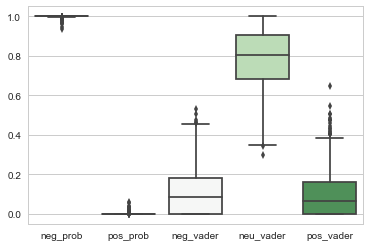

In [52]:
ax2 = sns.boxplot(data = df_s_nsubj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [34]:
df_s_obj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier
1,1,0.999837,0.000163,0.081,0.791,0.128,I've tried medications but they only made me f...,[dobj],-1
2,2,0.999824,0.000176,0.000,0.851,0.149,I'm against taking medication after what I had...,[dobj],-1
3,3,0.999947,0.000053,0.000,1.000,0.000,I see my doctor next week and I don't know wha...,[pobj],-1
4,4,0.996569,0.003431,0.032,0.770,0.198,"A bit of a strange question, I suppose, but he...",[pobj],-1
5,5,0.999981,0.000019,0.000,1.000,0.000,I'm currently getting off lexapro and I've had...,[pobj],-1
6,6,0.999828,0.000172,0.000,0.695,0.305,I honestly think the only thing left that woul...,[pobj],-1
7,7,0.999943,0.000057,0.000,0.794,0.206,How can I make it clear to whoever can actuall...,[dobj],-1
8,8,0.999760,0.000240,0.083,0.917,0.000,I've always what I'd consider moderate anxiety...,[dobj],-1
12,12,0.998438,0.001562,0.187,0.750,0.063,I first went it wanting to treat my anxiety wh...,[dobj],-1
13,13,0.999779,0.000221,0.066,0.778,0.156,"I've put thought into it, and I still want to ...",[pobj],-1


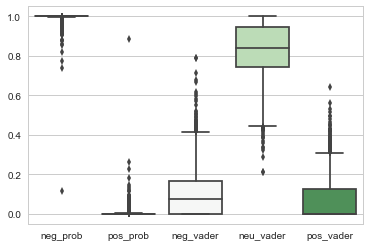

In [50]:
ax2 = sns.boxplot(data = df_s_obj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [35]:
df_s_other

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,sentence,dict,identifier
0,0,0.999358,0.000642,0.227,0.724,0.049,I have a feeling that this will only get worse...,[compound],0
9,9,0.999171,0.000829,0.251,0.749,0.000,I scheduled a GP appointment last week and he ...,[conj],0
10,10,0.999660,0.000340,0.000,1.000,0.000,I can't afford a consular right now or medicat...,[conj],0
21,21,0.999499,0.000501,0.000,1.000,0.000,Though recently I heard that some people on an...,[compound],0
27,27,0.999972,0.000028,0.000,1.000,0.000,"Hey guys,\n\nI just got prescribed new meds Le...",[compound],0
38,38,0.999784,0.000216,0.296,0.646,0.058,The ER doctor gave me muscle relaxants and som...,[conj],0
47,47,0.999982,0.000018,0.000,1.000,0.000,Topical medications?,[ROOT],0
48,48,0.999982,0.000018,0.000,1.000,0.000,Oral meds?,[ROOT],0
52,52,0.999997,0.000003,0.234,0.677,0.089,I just feel like I am too scared and crippled ...,[dative],0
61,61,0.999986,0.000014,0.000,1.000,0.000,She was an alternative-medicine type therapist...,[compound],0


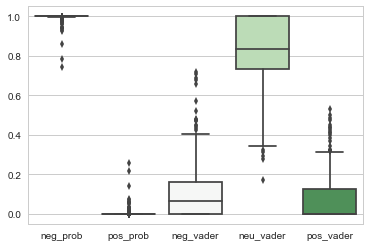

In [51]:
ax2 = sns.boxplot(data = df_s_other.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

### spacy: posts_5000 identify

In [36]:
df_p = pd.read_csv('p_med_with_score_first5000.csv')

In [14]:
def labelMed2(post):
    post = str(post)
    
    doc = parser(post)
    dictionary = {}
    
    for word in doc:
        dictionary[word.orth_] = word.dep_

    # print (dictionary)
    
    res = []
    
    for key, value in dictionary.items():
        if "medicine" in key:
            res.append(value)
        if "medication" in key:
            res.append(value)
        if "meds" in key:
            res.append(value)
            
    return res

In [15]:
df_p['dict'] = df_p['post'].map(lambda x: labelMed2(x))

In [16]:
df_p['identifier'] = df_p['dict'].map(lambda x: select_nubj_or_obj_or_other(x))

In [17]:
df_p

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier
0,0,0.987449,0.012551,0.156,0.771,0.073,Second day on drugs and it has already started...,[compound],0
1,1,0.994773,0.005227,0.204,0.708,0.088,I'm not sure where to start. I've been lurking...,[dobj],-1
2,2,0.997802,0.002198,0.263,0.688,0.049,I'm a 23 year old female and I've been battlin...,"[dobj, pobj]",-1
3,3,0.928401,0.071599,0.164,0.730,0.106,"A bit of a strange question, I suppose, but he...",[pobj],-1
4,4,0.999992,0.000008,0.000,0.950,0.050,Has anyone ever had this experience that nothi...,[pobj],-1
5,5,0.997977,0.002023,0.209,0.754,0.038,"To start, I'm using a throwaway/anonymous acco...",[dobj],-1
6,6,0.997678,0.002322,0.092,0.808,0.100,I've always what I'd consider moderate anxiety...,[dobj],-1
7,7,0.998581,0.001419,0.109,0.696,0.195,Hey everyone. I've been lurking here for aroun...,[conj],0
8,8,0.117632,0.882368,0.200,0.714,0.086,"I have GAD, I have had many anxieties come and...",[conj],0
9,9,0.132913,0.867087,0.085,0.786,0.128,I have a nearly impossible time saying no to a...,[nsubj],1


In [21]:
df_p_nsubj = df_p[df_p['identifier'] == 1]
df_p_nsubj.to_csv('p_med_5000_nsubj.csv')

df_p_obj = df_p[df_p['identifier'] == -1]
df_p_obj.to_csv('p_med_5000_obj.csv')

df_p_other = df_p[df_p['identifier'] == 0]
df_p_other.to_csv('p_med_5000_other.csv')

In [22]:
df_p_nsubj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier
9,9,0.132913,0.867087,0.085,0.786,0.128,I have a nearly impossible time saying no to a...,[nsubj],1
10,10,0.999156,0.000844,0.121,0.808,0.071,I've been working with my doctor over the past...,"[dobj, dobj, nsubj]",1
11,11,0.039714,0.960286,0.160,0.723,0.117,"**Actual experiences with meds will be quoted,...","[pobj, nsubj]",1
63,63,0.999172,0.000828,0.205,0.765,0.030,"I don't know what to do. I'm live in the UK, a...",[nsubj],1
64,64,0.662993,0.337007,0.084,0.808,0.108,I've finally taken the first step to overcomin...,[nsubj],1
68,68,0.971667,0.028333,0.127,0.739,0.134,Last year I entered college out of state. I ha...,[nsubj],1
74,74,0.995452,0.004548,0.060,0.910,0.030,So I work full time and my job pays very littl...,"[pobj, nsubj]",1
78,78,0.001297,0.998703,0.226,0.676,0.097,This is my first reddit post ever. I've hardly...,"[dobj, nsubj]",1
79,79,0.995665,0.004335,0.118,0.789,0.093,"Hello, I really need some help.\n\nMy mother i...",[nsubj],1
101,101,0.979066,0.020934,0.114,0.759,0.127,So I have SEVERE anxiety. To the point where I...,"[pobj, nsubj]",1


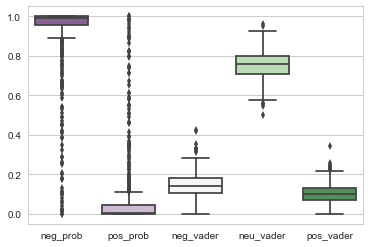

In [49]:
ax1 = sns.boxplot(data = df_p_nsubj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [ ]:
ax2 = sns.boxplot(data = df_p_obj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [23]:
df_p_obj

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier
1,1,0.994773,0.005227,0.204,0.708,0.088,I'm not sure where to start. I've been lurking...,[dobj],-1
2,2,0.997802,0.002198,0.263,0.688,0.049,I'm a 23 year old female and I've been battlin...,"[dobj, pobj]",-1
3,3,0.928401,0.071599,0.164,0.730,0.106,"A bit of a strange question, I suppose, but he...",[pobj],-1
4,4,0.999992,0.000008,0.000,0.950,0.050,Has anyone ever had this experience that nothi...,[pobj],-1
5,5,0.997977,0.002023,0.209,0.754,0.038,"To start, I'm using a throwaway/anonymous acco...",[dobj],-1
6,6,0.997678,0.002322,0.092,0.808,0.100,I've always what I'd consider moderate anxiety...,[dobj],-1
12,12,0.993021,0.006979,0.153,0.787,0.060,I am a 19 year old female diagnosed with a GAD...,[dobj],-1
13,13,0.999615,0.000385,0.273,0.596,0.130,Have been having difficulty breathing and ches...,[pobj],-1
15,15,0.661465,0.338535,0.137,0.775,0.089,I am in desperate need of some help... and I n...,"[pobj, pobj]",-1
16,16,0.666711,0.333289,0.168,0.719,0.113,I think I need to pour this out in one place. ...,[pobj],-1


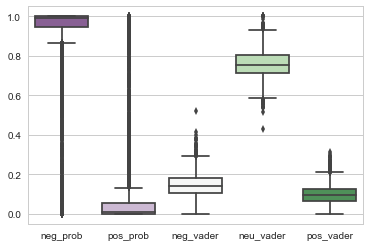

In [48]:
ax2 = sns.boxplot(data = df_p_obj.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")

In [24]:
df_p_other

,Unnamed: 0,neg_prob,pos_prob,neg_vader,neu_vader,pos_vader,post,dict,identifier
0,0,0.987449,0.012551,0.156,0.771,0.073,Second day on drugs and it has already started...,[compound],0
7,7,0.998581,0.001419,0.109,0.696,0.195,Hey everyone. I've been lurking here for aroun...,[conj],0
8,8,0.117632,0.882368,0.200,0.714,0.086,"I have GAD, I have had many anxieties come and...",[conj],0
14,14,0.658450,0.341550,0.088,0.856,0.057,"I do not have depression or anxiety, I have ne...",[compound],0
18,18,0.999156,0.000844,0.081,0.778,0.141,"Hey guys,\n\nI just got prescribed new meds Le...",[compound],0
27,27,0.970572,0.029428,0.220,0.702,0.078,I spent my morning in the ER today because I w...,[conj],0
35,35,0.504630,0.495370,0.132,0.772,0.096,"Hi, I stumbled upon this group searching for s...","[ROOT, ROOT]",0
41,41,0.999640,0.000360,0.106,0.774,0.120,Iama long long time lurker who finally found t...,[nsubjpass],0
51,51,0.989934,0.010066,0.092,0.792,0.116,"During my last appointment with my doctor, he ...",[dep],0
53,53,0.332508,0.667492,0.118,0.708,0.175,Ok so for a couple of years maybe I feel like ...,[conj],0


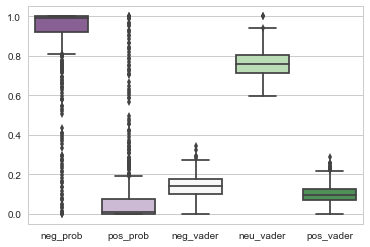

In [47]:
ax = sns.boxplot(data = df_p_other.loc[:,['neg_prob','pos_prob','neg_vader','neu_vader','pos_vader']], palette = "PRGn")